Lo primero que haremos sera importar librerías que usaremos.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Ahora indicaremos la ubicasion del archivo sobre el que trabajaremos.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

ruta = "/gdrive/MyDrive/Escuela/Mineria/NetflixOriginals_clean.csv"
data = pd.read_csv(ruta,encoding ="latin1")


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
print(data.shape)
data.head()


(121, 6)


,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Feminists: What Were They Thinking?,documentary,"October 12, 2018",86,7.0,ingleslish
1,Gaga: Five Foot Two,documentary,"September 22, 2017",100,7.0,ingleslish
2,Kingdom of Us,documentary,"October 13, 2017",109,7.0,ingleslish
3,Los Tigres del Norte at Folsom Prison,documentary,"September 15, 2019",64,7.0,spanish
4,Ma Rainey's Black Bottom,drama,"December 18, 2020",94,7.0,ingleslish


#Análisis de variables individuales

Con "data.info()" se veran las variables categóricas


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       121 non-null    object 
 1   Genre       121 non-null    object 
 2   Premiere    121 non-null    object 
 3   Runtime     121 non-null    int64  
 4   IMDB Score  121 non-null    float64
 5   Language    121 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.8+ KB


Graficas de barras de las variables que se tienen

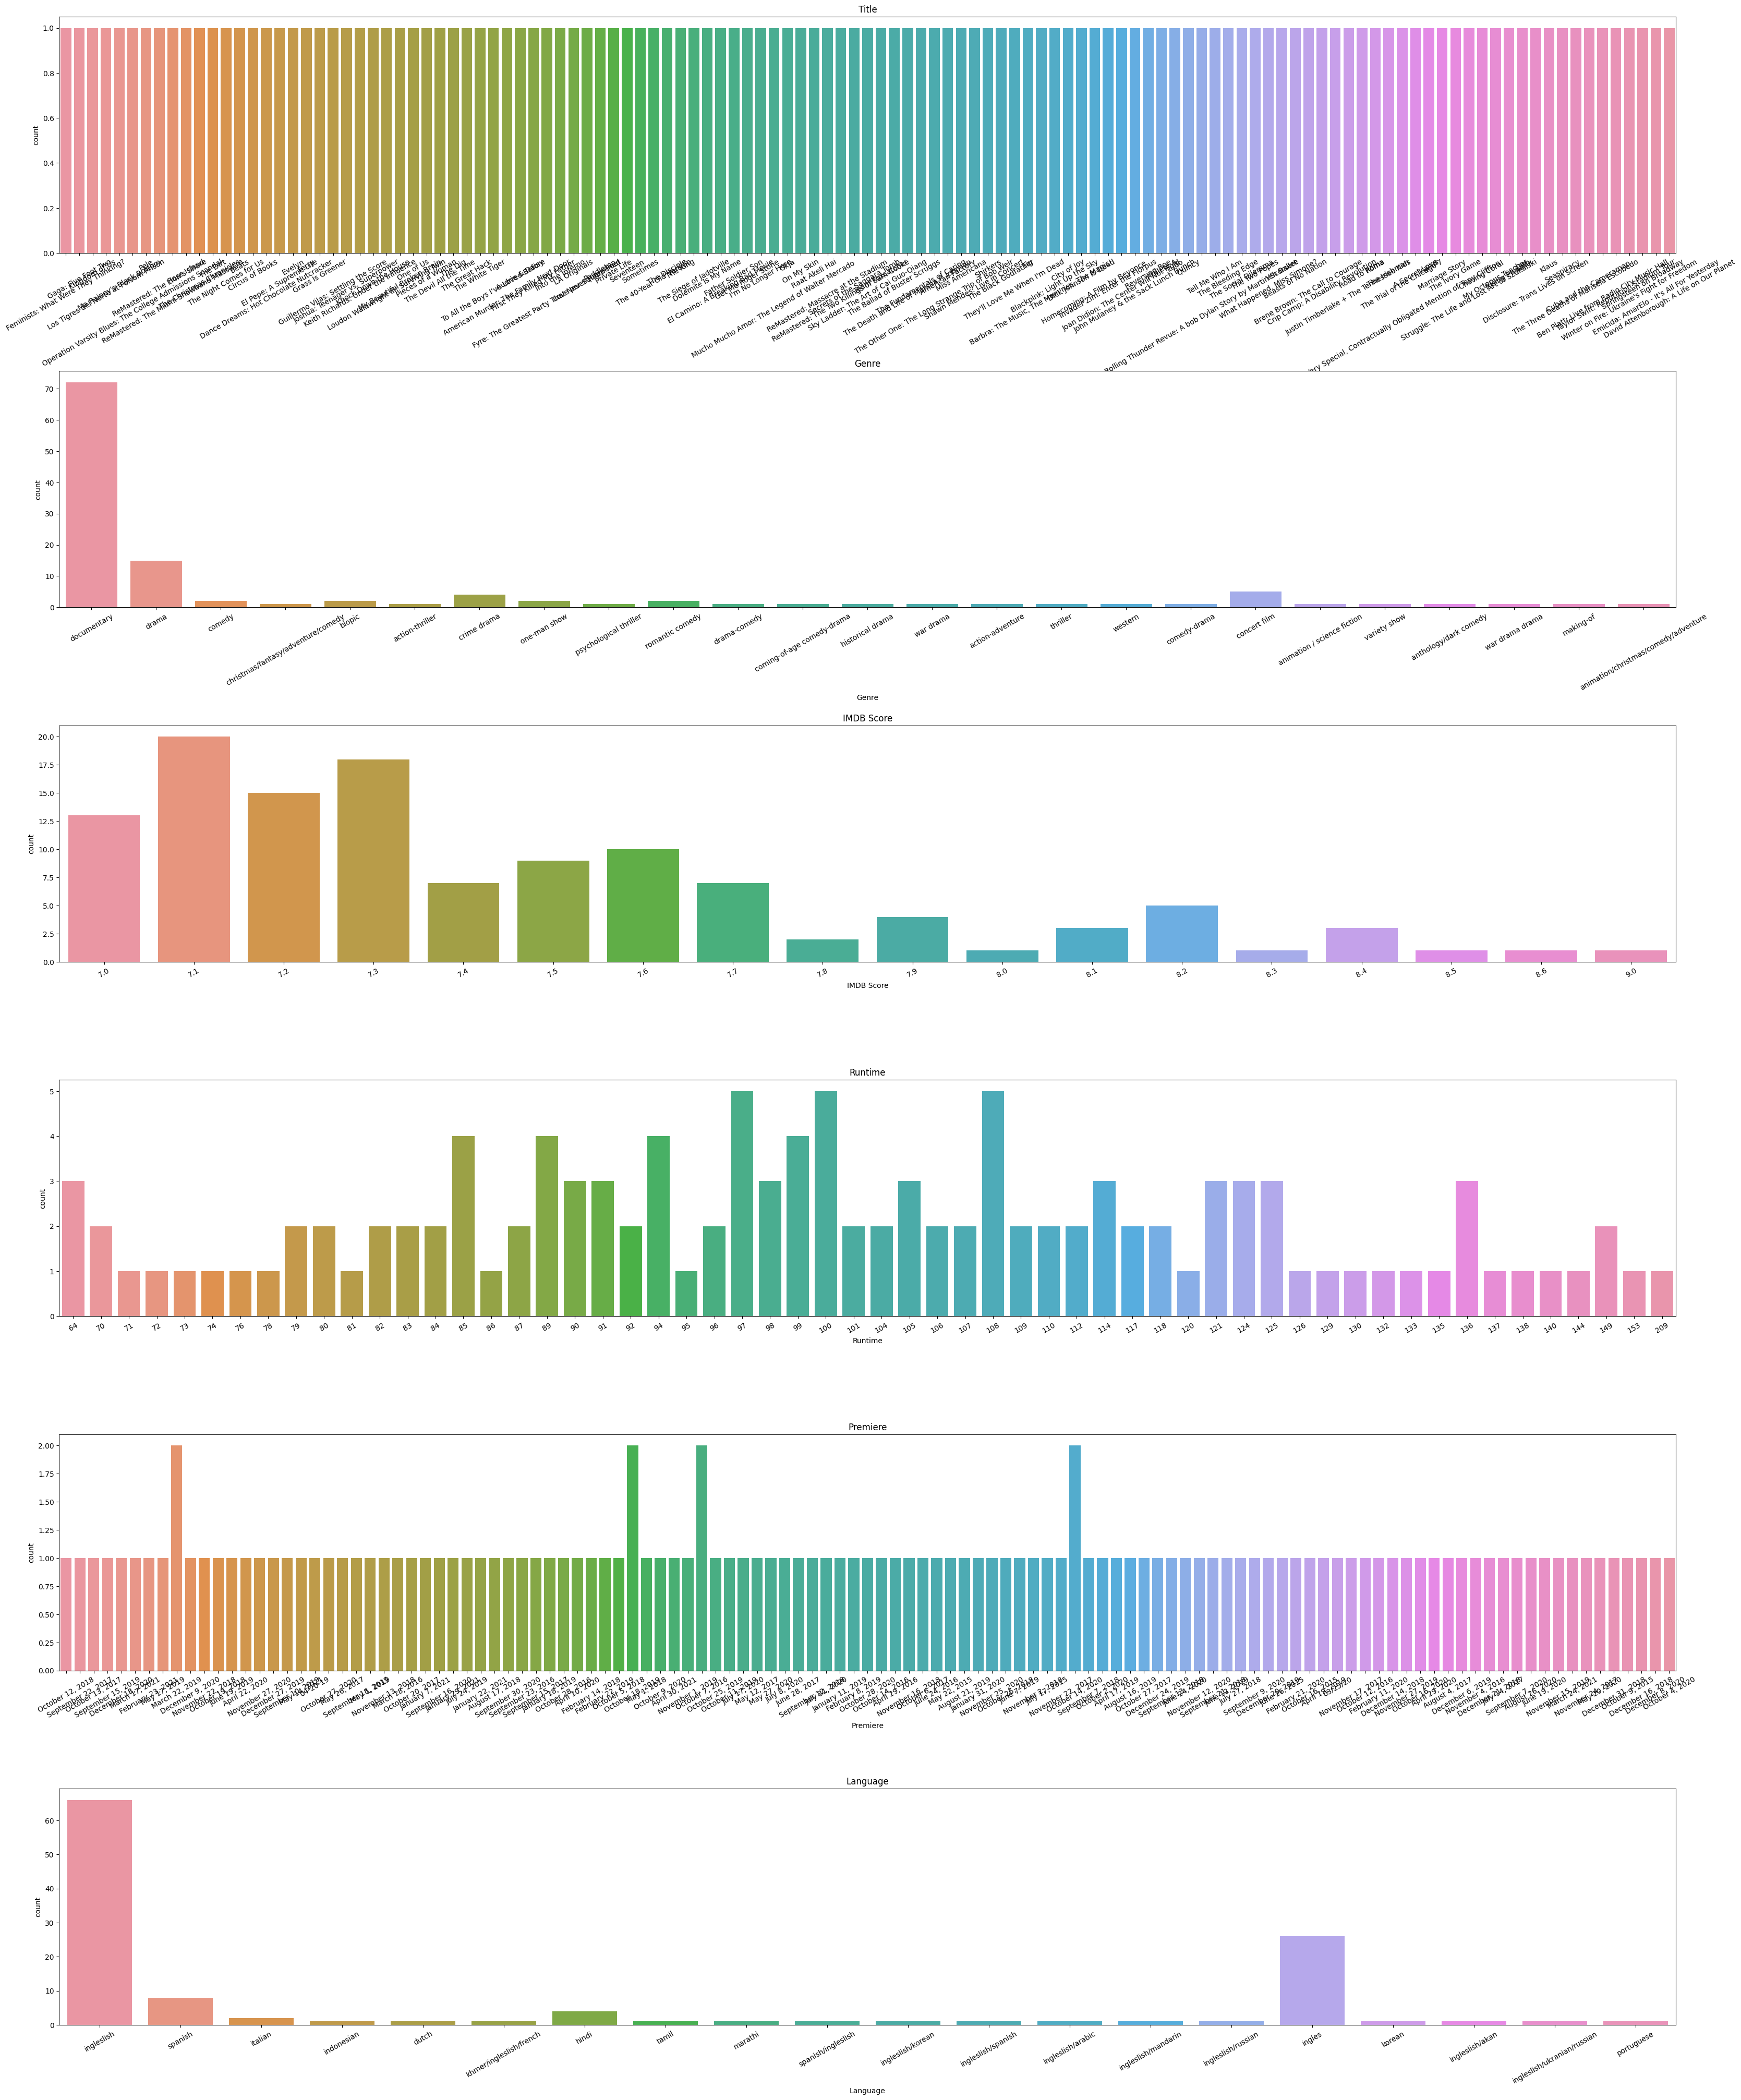

In [ ]:
col_cat = ['Title', 'Genre', 'IMDB Score', 'Runtime', 'Premiere', 'Language']

# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(40,50))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

Eliminemos las columnas 'Title', 'IMDB Score', 'Premiere, 'Language' ya que no aportan información sobre el cliente 'Genre', 'Runtime'


In [ ]:
data.drop(columns=['Title', 'Premiere', 'Language'],inplace=True)
data.columns


Index(['Genre', 'Runtime', 'IMDB Score'], dtype='object')

Extracion de las variables estadísticas descriptivas básicas que se tienen.

In [ ]:
data.describe()


,Runtime,IMDB Score
count,121.000000,121.000000
mean,103.314050,7.452066
std,22.164925,0.416553
min,64.000000,7.000000
25%,89.000000,7.100000
50%,100.000000,7.300000
75%,117.000000,7.600000
max,209.000000,9.000000


Graficacion de variables 'Genre' y 'Runtime'

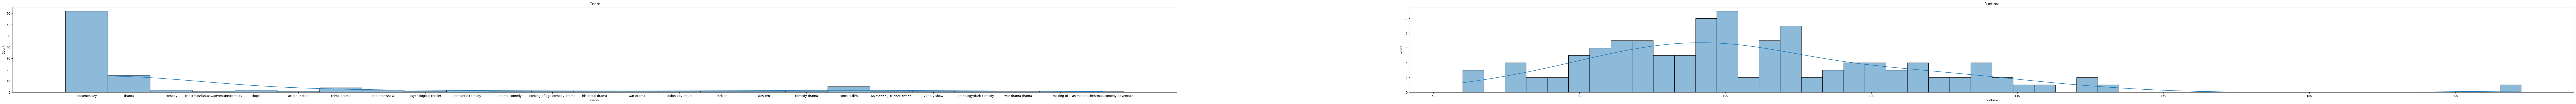

In [ ]:
# Dibujar histogramas
col_num = ['Genre', 'Runtime']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(150,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    if col == 'Genre':
        nbins = 10
    else:
        nbins = 50
    sns.histplot(x=col, data=data, ax=ax[i], bins=nbins, kde = True)
    ax[i].set_title(col)

Analicis del comportamiento de Runtime

In [ ]:
data['Runtime'].describe()


count    121.000000
mean     103.314050
std       22.164925
min       64.000000
25%       89.000000
50%      100.000000
75%      117.000000
max      209.000000
Name: Runtime, dtype: float64

Creacion de la funcion para realizar la graficasion de las tasas de convercion

In [ ]:
def graficar_tasas_conversion(var_predictora, var_predecir, type='line', order=None):
    x, y = var_predictora, var_predecir

    # Generar agrupaciones (groupby), calcular tasa de conversión (mean),
    # multiplicarla por 100 (mul(100))
    grupo = data.groupby(x)[y].mean().mul(100).rename('tasa_conv').reset_index()

    # Y generar gráfica
    if type=='line': # Útil para rangos continuos
        plt.figure(figsize=(40,6))
        sns.lineplot(x=var_predictora, y='tasa_conv', data=grupo)
        plt.grid()
    elif type=='bar': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(44,6))
        sns.barplot(x=var_predictora, y='tasa_conv', data=grupo, order=order)
        plt.grid()
    elif type=='scatter': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(40,6))
        sns.scatterplot(x=var_predictora, y='tasa_conv', data=grupo)
        plt.grid()


Graficacion sobre las tasas de conversión para la variable 'Genre' y 'Runtime'.

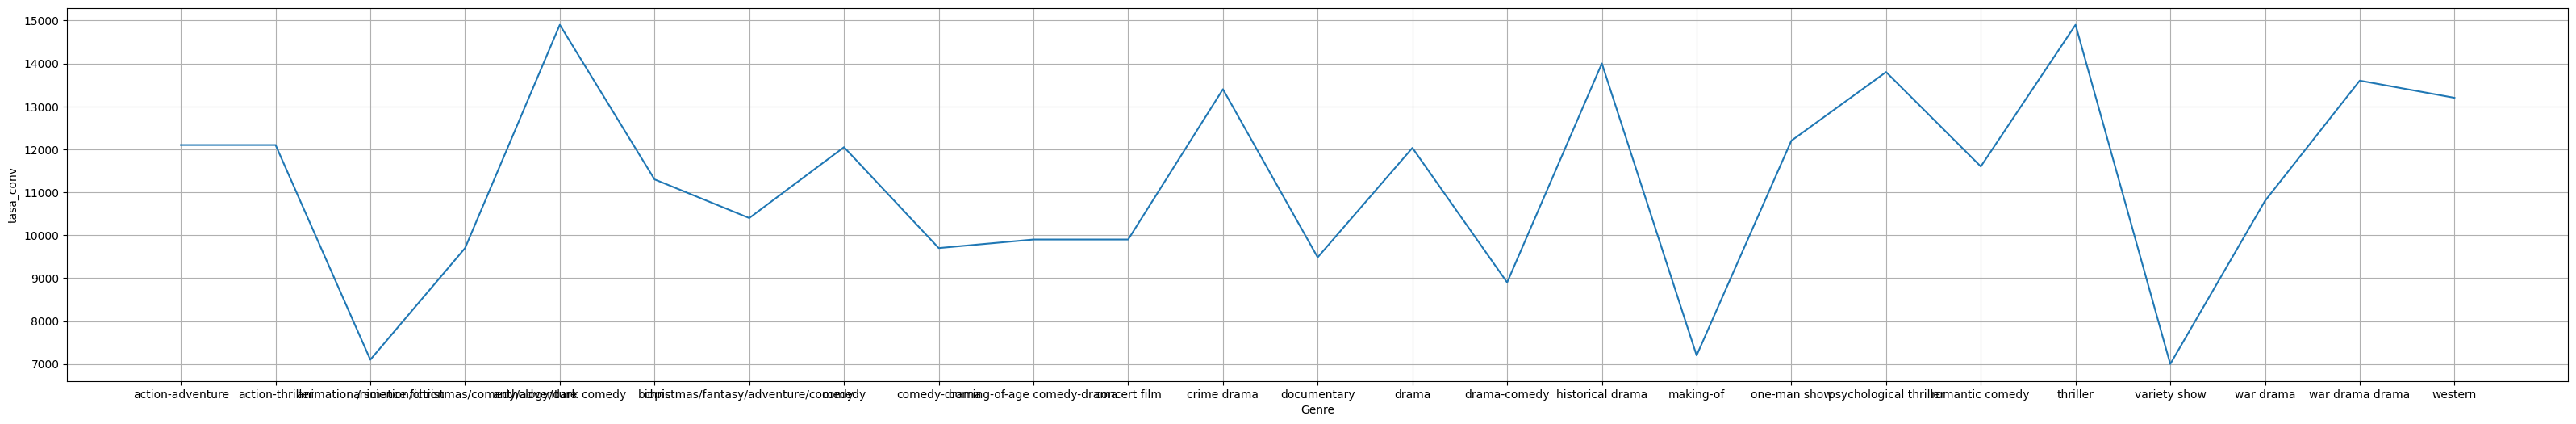

In [ ]:
graficar_tasas_conversion('Genre','Runtime')


Creacion de subbrupos de Runtime y calculo de las tasas de conversión en cada uno de los casos creados.


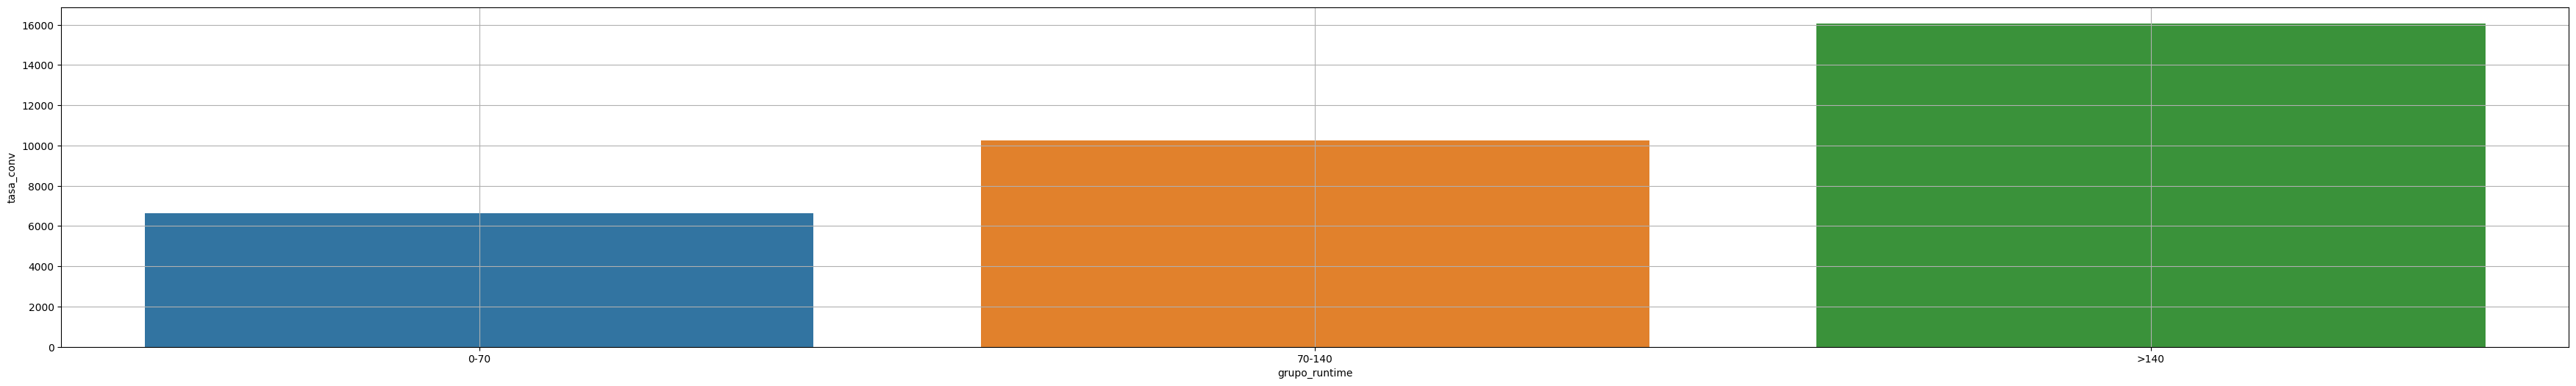

In [ ]:
# Nueva columna en el dataset: "grupo_runtime"
data.loc[:,'grupo_runtime'] = "0-70"
data.loc[data['Runtime']>140,'grupo_runtime'] = ">140"
data.loc[(data['Runtime']>70)&(data['Runtime']<=140), 'grupo_runtime'] = "70-140"

# Y grafiquemos la tasa de conversión para esta nueva columna
graficar_tasas_conversion('grupo_runtime', 'Runtime', type='bar')

Creacion de nueva columna para la subdivicion de variables.

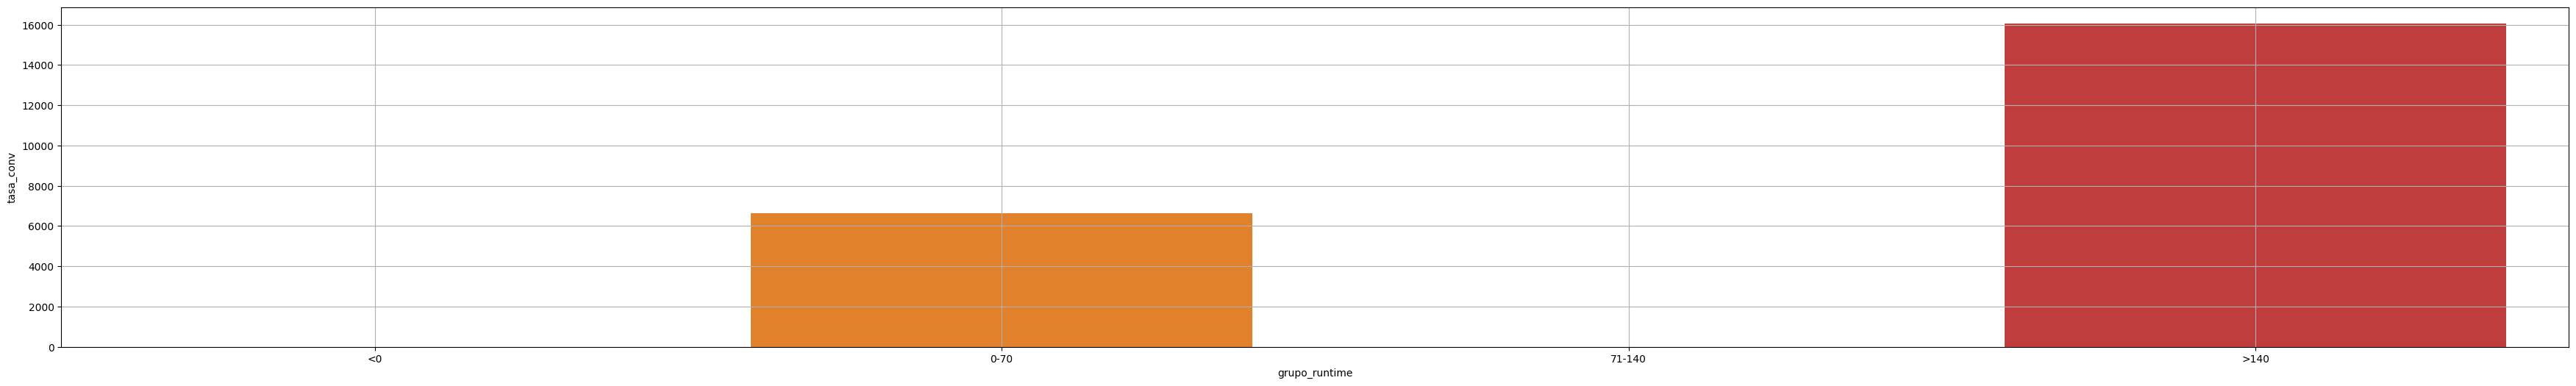

In [ ]:
# Nueva columna en el dataset: "grupo_runtime"
data.loc[(data['Runtime']>=0) & (data['Runtime']<=70),'grupo_runtime'] = "0-70"
data.loc[(data['Runtime']>=71) & (data['Runtime']<=140),'grupo_runtime'] = "70-140"
data.loc[data['Runtime']>140,'grupo_runtime'] = ">140"

# Y grafiquemos la tasa de conversión para esta nueva columna
#graficar_tasas_conversion('grupo_runtime','y_bin',type='bar')
orden = ['<0', '0-70', '71-140', '>140']
graficar_tasas_conversion('grupo_runtime','Runtime',type='bar', order=orden)

#Conclusion
Despues de realizar el analicis de los resultados obtenidos  puedo decir concluir que existe cierta relacion entre los datos que determinados generos de peliculas tineden a ser mas exitosos que otros generos, encabezando esta lista los generos que se relacionan con la comedia, ademas de que las pelicuales que por lo general duran mas son las peiliculas de accion.